In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [13]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [14]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [15]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [16]:
df.shape

(284807, 31)

In [17]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Fraudulent Cases: 492
Valid Transactions: 284315


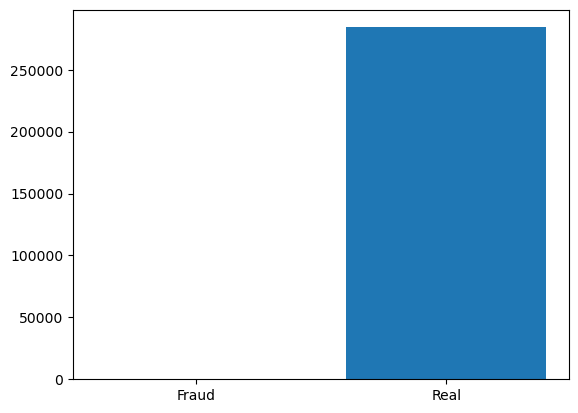

In [19]:
label_size = [df['Class'].sum(), len(df['Class'])- df['Class'].sum()]
plt.bar(['Fraud','Real'],label_size)
print('Fraudulent Cases: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0]))) 

In [21]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
creditCard_df = df.iloc[:, 1:]
creditCard_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 30 columns]

In [26]:
#Separating the independent and dependent variables
X=creditCard_df.drop('Class', axis=1).values
y=creditCard_df['Class'].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [50]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [51]:
logreg = LogReg(solver='lbfgs', max_iter=10000)

# Fitting the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
train_predict = logreg.predict(X_train)
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
k = f1_score(train_predict, y_train)
print('Training f1_score', k )

Training f1_score 0.7394366197183099


In [54]:
test_predict = logreg.predict(X_test)
k = f1_score(test_predict, y_test)
print('Test f1_score    ', k )

Test f1_score     0.6934306569343065


In [55]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, test_predict)
print(cf)

[[85264    19]
 [   65    95]]


In [63]:
from sklearn.metrics import classification_report as rep
print(rep( y_test , test_predict ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.83      0.59      0.69       160

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [73]:
# Fit the decision tree model
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(200, 200))
tree.plot_tree(decisionTree, ax=ax, feature_names=creditCard_df.drop('Class', axis=1).columns, class_names=True, filled=True)
plt.show()

In [ ]:
decisionTree_predict = decisionTree.predict(X_test)
k = f1_score(decisionTree_predict, y_test)
print('Test f1_score    ', k )

In [ ]:
cf= confusion_matrix(y_test, test_predict)
print(cf)

In [ ]:
print(rep( y_test , decisionTree_predict))

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier(
    loss='deviance',
    n_estimators=500,
    max_depth=3,
    min_samples_split=100,
    learning_rate=0.01,
    subsample=0.5
)
gbm.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [ ]:
gbm_iter = gbm.best_iteration

In [ ]:
gbm_test = gbm.predict(X_test, num_iteration=gbm_iter)

In [ ]:
k = f1_score(gbm_predict, y_test)
print('Test f1_score    ', k )

In [ ]:
print(rep(y_test , gbm_predict))

In [76]:
import numpy as np
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [82]:
LAYERS = [tf.keras.layers.Dense(10, input_dim=X_train.shape[1], activation="relu", name="hiddenLayer_1"),
              tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")
             ]
ANN= tf.keras.models.Sequential(LAYERS)
ANN.summary()
LOSS_Function = 'binary_crossentropy'
OPTIMIZER = 'adam'
Metrics = ['accuracy']
ANN.compile(loss=LOSS_Function, optimizer=OPTIMIZER, metrics=Metrics) 
print(ANN)
EPOCH = 10
history = ANN.fit(X_train, y_train, epochs=EPOCH, batch_size=10)
# # Build the ANN model
# ANN_model = Sequential()
# ANN_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
# ANN_model.add(Dense(1, activation='sigmoid'))
# ANN_model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the ANN model
# ANN_model.fit(X_train, y_train, epochs=10, batch_size=10)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer_1 (Dense)       (None, 10)                300       
                                                                 
 outputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
19937/19937 [==============================] - 33s 2ms/step - loss: 0.0089 - accuracy: 0.9982
Epoch 2/10
19937/19937 [==============================] - 32s 2ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 3/10
19937/19937 [==============================] - 32s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 4/10
19937/19937 [==============================] - 31s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/10
19937/19937 [========

In [ ]:
# Visualize the ANN model
from keras.utils.vis_utils import plot_model
plot_model(ANN, show_shapes=True, show_layer_names=True)



In [ ]:
# Make predictions on the test data
ANN_predict = ANN.predict(X_test)
ANN_predict = np.where(ANN_predict > 0.5, 1, 0)

In [ ]:
k = f1_score(ANN_predict, y_test)
print('Test f1_score    ', k )

In [ ]:
print(rep(y_test , ANN_predict))